In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\datasets\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df = df.rename(columns = {"age":"Age", "sex": "Sex", "cp":"Chest_pain", "trestbps":"Resting_BP", "chol":"Cholestrol", "fbs":"Fasting_blood_sugar", "restecg":"ECG_result", "thalach":"Max_heartrate", "exang":"Exercise_induced_agina", "oldpeak":"ECG difference", "ca":"Blocked vessels","slope":"Slope", "thal":"Thalassemia", "target":"Target"})
#renaming columns

In [5]:
df.head()

,Age,Sex,Chest_pain,Resting_BP,Cholestrol,Fasting_blood_sugar,ECG_result,Max_heartrate,Exercise_induced_agina,ECG difference,Slope,Blocked vessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df1 = df.copy()
df2 = df.copy() #Making copies for later use

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     303 non-null    int64  
 1   Sex                     303 non-null    int64  
 2   Chest_pain              303 non-null    int64  
 3   Resting_BP              303 non-null    int64  
 4   Cholestrol              303 non-null    int64  
 5   Fasting_blood_sugar     303 non-null    int64  
 6   ECG_result              303 non-null    int64  
 7   Max_heartrate           303 non-null    int64  
 8   Exercise_induced_agina  303 non-null    int64  
 9   ECG difference          303 non-null    float64
 10  Slope                   303 non-null    int64  
 11  Blocked vessels         303 non-null    int64  
 12  Thalassemia             303 non-null    int64  
 13  Target                  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

we can see that the columns don't have any null values and the datatype is int and float, so that we don't have to deal with null values and change data types


In [96]:
df.describe()

,Age,Sex,Chest_pain,Resting_BP,Cholestrol,Fasting_blood_sugar,ECG_result,Max_heartrate,Exercise_induced_agina,ECG difference,Slope,Blocked vessels,Thalassemia,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


we can see that there is huge difference between the 50% and 75% of Cholestrol and ECG_difference which suggests that there are outliers, to confirm this, we will plot a boxplot

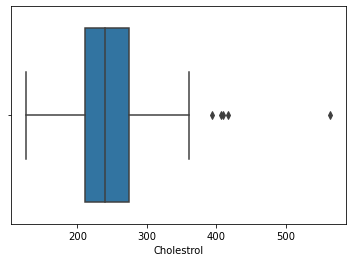

In [112]:
sns.boxplot(x = df["Cholestrol"])

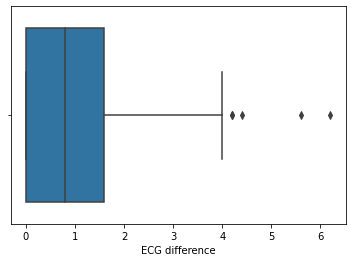

In [111]:
sns.boxplot(x = df["ECG difference"])

As evident from the above 2 plots, there are certain outliers in both cholestrol and ECG difference which can be dealt with while modelling

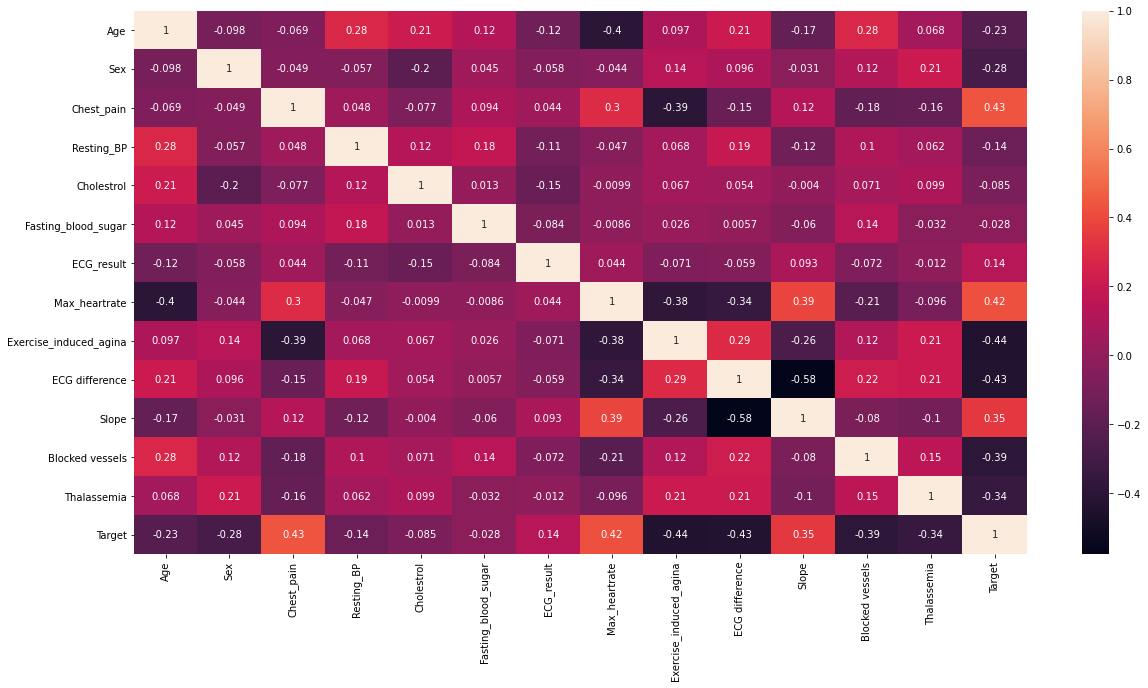

In [94]:
df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

# Univariate Analysis

1    207
0     96
Name: Sex, dtype: int64

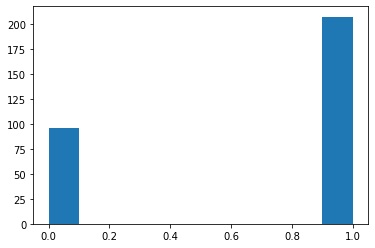

In [113]:
plt.hist(df["Sex"])
df["Sex"].value_counts()

we can see that there are more males in our obeservation than females

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

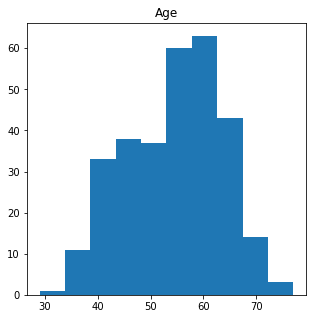

In [7]:
plt.figure(figsize = (5,5))
plt.title("Age")
plt.hist(df["Age"])

We can see that we have a variety of cases ranging from 30 to approximately 80 years of age, which gives us a good range and varitey of cases

(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <a list of 10 Patch objects>)

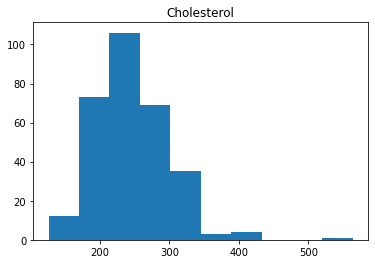

In [8]:
plt.title("Cholesterol")
plt.hist(df["Cholestrol"])


the cholesterol lies between 200 to 400, most people have their cholesterol between 200-300 range

(array([10., 42., 67., 74., 57., 27., 13.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <a list of 10 Patch objects>)

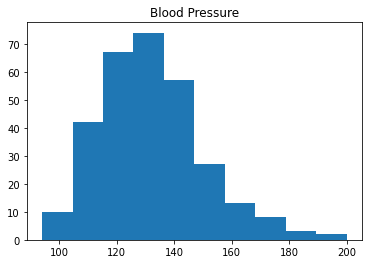

In [9]:
plt.title("Blood Pressure")
plt.hist(df["Resting_BP"])


the blood pressure lies between 100-180, the most common BP is between 120-140

# Bivariate Analysis

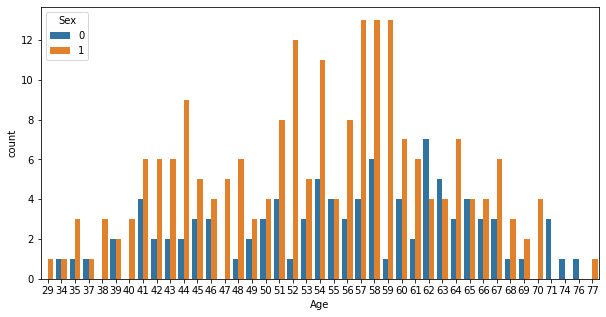

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(x = df["Age"], hue = df["Sex"])

we can see that there are more males than females in the data and the majority of people are between the age group of 40-65

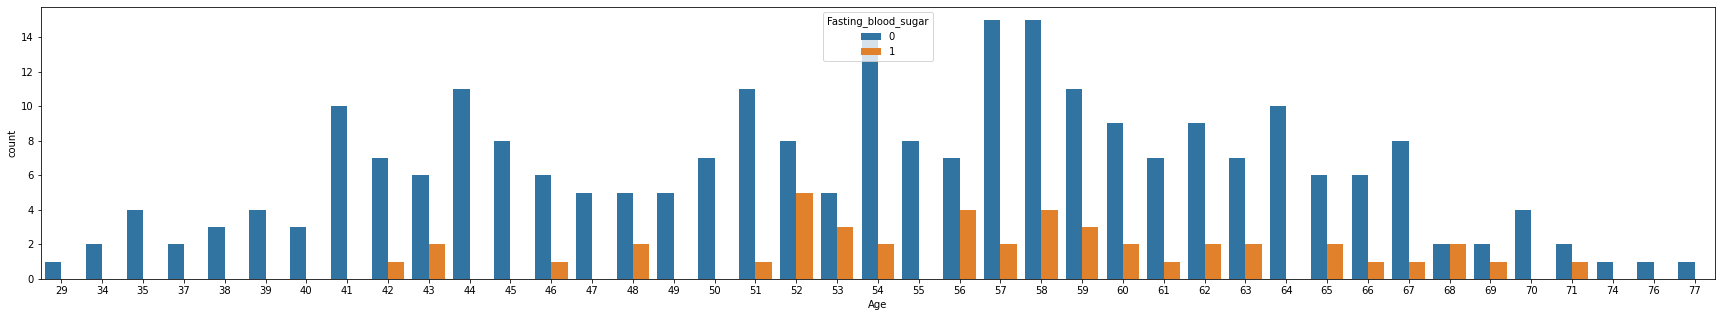

In [21]:
plt.figure(figsize = (30,5))
sns.countplot(x = df["Age"], hue = df["Fasting_blood_sugar"])

fasting blood sugar relationship with Age

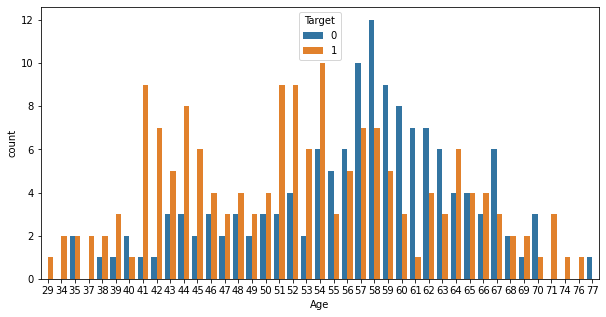

In [27]:
plt.figure(figsize = (10,5))
sns.countplot(x = df["Age"], hue = df["Target"] )

we can see that maximum heart attacks happen during the age of 40-60

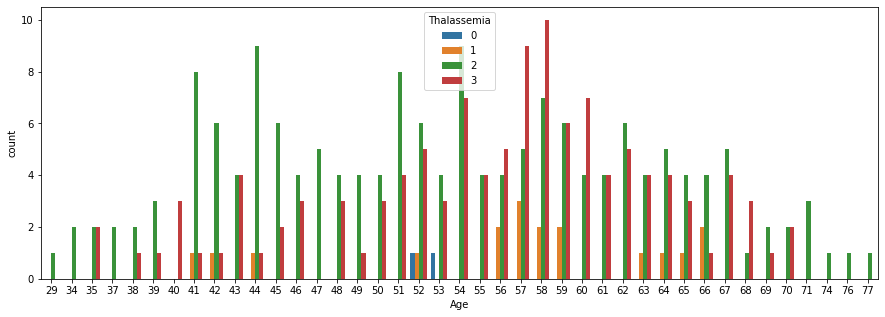

In [30]:
plt.figure(figsize = (15,5))
sns.countplot(x = df["Age"], hue = df["Thalassemia"])

we can see that before 50, Type 2 is more common and after 55, both type 2 and type 3 are present, type 1 is more evident in ages 55-65 and there are little traces of type 0

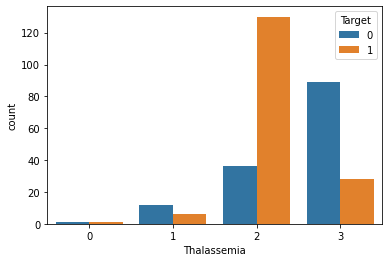

In [33]:
sns.countplot(x = df["Thalassemia"], hue = df["Target"])

we can see that majority of positive targets are have type 2 thalassemia

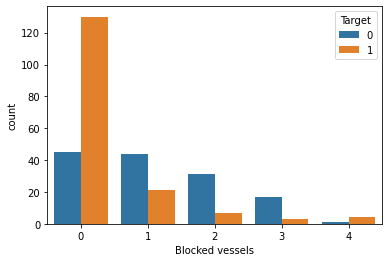

In [36]:
sns.countplot(x = df["Blocked vessels"], hue = df["Target"])

# Gathering some more data

In [54]:
a = df.groupby(["Sex", "Age"])["Target"].count().reset_index().sort_values(by = "Target", ascending = False)
a["Sex"].replace({1:"Male", 0:"Female"}, inplace = True)
a.head(20).style.background_gradient(cmap = "Greys")

,Sex,Age,Target
59,Male,58,13
58,Male,57,13
60,Male,59,13
53,Male,52,12
55,Male,54,11
45,Male,44,9
52,Male,51,8
57,Male,56,8
61,Male,60,7
65,Male,64,7


we can see from the above data that older males are more susceptible to heart attacks than females 

In [87]:
a = df.groupby(["Age" ,"Chest_pain"])["Target"].count().reset_index().sort_values(by = "Target", ascending = False)
#a["Sex"].replace({1:"Male", 0:"Female"}, inplace = True)
a.head(20).style.background_gradient(cmap = "Greys")

,Age,Chest_pain,Target
59,57,0,11
62,58,0,10
70,60,0,7
76,62,0,7
42,51,2,7
52,54,2,7
66,59,0,7
19,43,0,6
13,41,1,6
50,54,0,6


we can see that males above 50 having chest pains of type 0 are more susceptible to heart attacks than any other types